# _automaton_.synchronize

Create a new transducer, equivalent to the first one, but where the transitions advance along all the tapes at the same rate, for as long as possible. The transitions before the final states may have the empty word on one of the tapes, to allow for words of different lengths on the input and output.

Preconditions:
- The input automaton is a transducer.
- Input.has_bounded_lag

Postconditions:
- Result.is_synchronized

See also:
- [_automaton_.has_bounded_lag](automaton.has_bounded_lag.ipynb)
- [_automaton_.is_synchronized](automaton.is_synchronized.ipynb)

## Examples

In [1]:
import vcsn
ctx = vcsn.context("lat<law_char, law_char>, b")
ctx

{...}* x {...}* -> B

The following automaton is not synchronized (the first transition is already not synchronized):

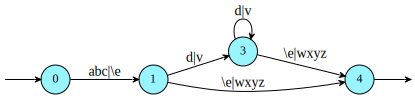

In [2]:
a = ctx.expression(r"(abc|\e)(d|v)*(\e|wxyz)").standard()
a

The lag is bounded, because every cycle (here, the loop) has a lag of 0.

In [3]:
a.has_bounded_lag()

True

Apart from pure spontaneous transitions, the only transitions with $\varepsilon$ in them are right before the final state.

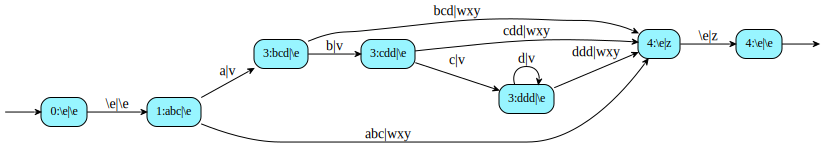

In [4]:
s = a.synchronize()
s

In [5]:
s.is_synchronized()

True

This is a (for the most part) letter-to-letter transducer equivalent to the input.

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


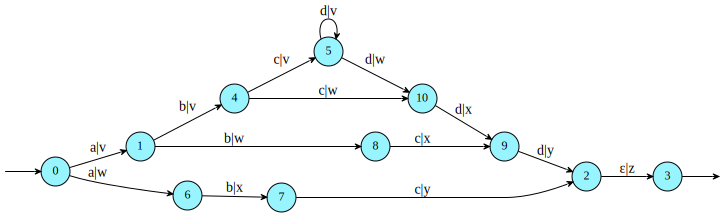

In [6]:
s.proper().letterize().minimize().strip()